<div style="text-align: center"> 11214369 - Nguyen Vu Anh Ngoc </div>

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets

from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Q1: Why ensemble methods are commonly based on Decision Tree?

- Bagging focuses more on reducing the variance than the bias. Therefore, bagging performs optimally when the ensemble members have high variance and low bias, (e.g., Decision Tree). Meanwhile, k-nearest Neighbor (KNN) and Naïve Bayes are examples of stable algorithms, and bagging does not perform well with these algorithms as base learners (*[A unified framework for global optimization of ensemble models](https://ieeexplore.ieee.org/document/9353404)*)

- Boosting focuses more on reducing bias than variance. Therefore, it enhances base learners with a high bias and low variance, such as decision stumps (a decision tree with one internal node). (*[A unified framework for global optimization of ensemble models](https://ieeexplore.ieee.org/document/9353404)*)

- The human interpretability of a tree model such as CART is often seen as its major strength. *(PRML)*

- Random forest’s popularity continues to increase, primarily due to its simplicity and predictive performance. In addition, random forest is considered an easy to tune method compared to other methods (e.g., GBM) that require careful tuning. ([*Ensemble learning: A survey*](https://doi.org/10.1002/widm.1249))

# Q2: Why do we use Decision Tree as weak learner when constructing Gradient Boosting?

- Simplicity: They can train quickly, making it efficient to create many of them for the ensemble.
- Flexibility: They work well with various data types and can capture complex relationships without overfitting.
- Interpretability: Their structure allows some understanding of how the model makes predictions.

# Q3: Re-construct the loss of GBDT.

Consider the case of regression with mean squared error loss. The loss function for a single decision tree can be represented as:

$$ L(y, \hat{y}) = \frac{1}{2}(y - \hat{y})^2 $$

Where:
- $y$ is the true target value.
- $\hat{y}$ is the predicted target value.

The loss function for the entire ensemble (sum of decision trees) becomes:

$$ L(y, F(x)) = \sum_{i=1}^{N} L(y_i, F(x_i)) $$

Where:
- $N$ is the number of samples.
- $y_i$ is the true target value for sample $i$.
- $F(x_i)$ is the ensemble's prediction for sample $i$.

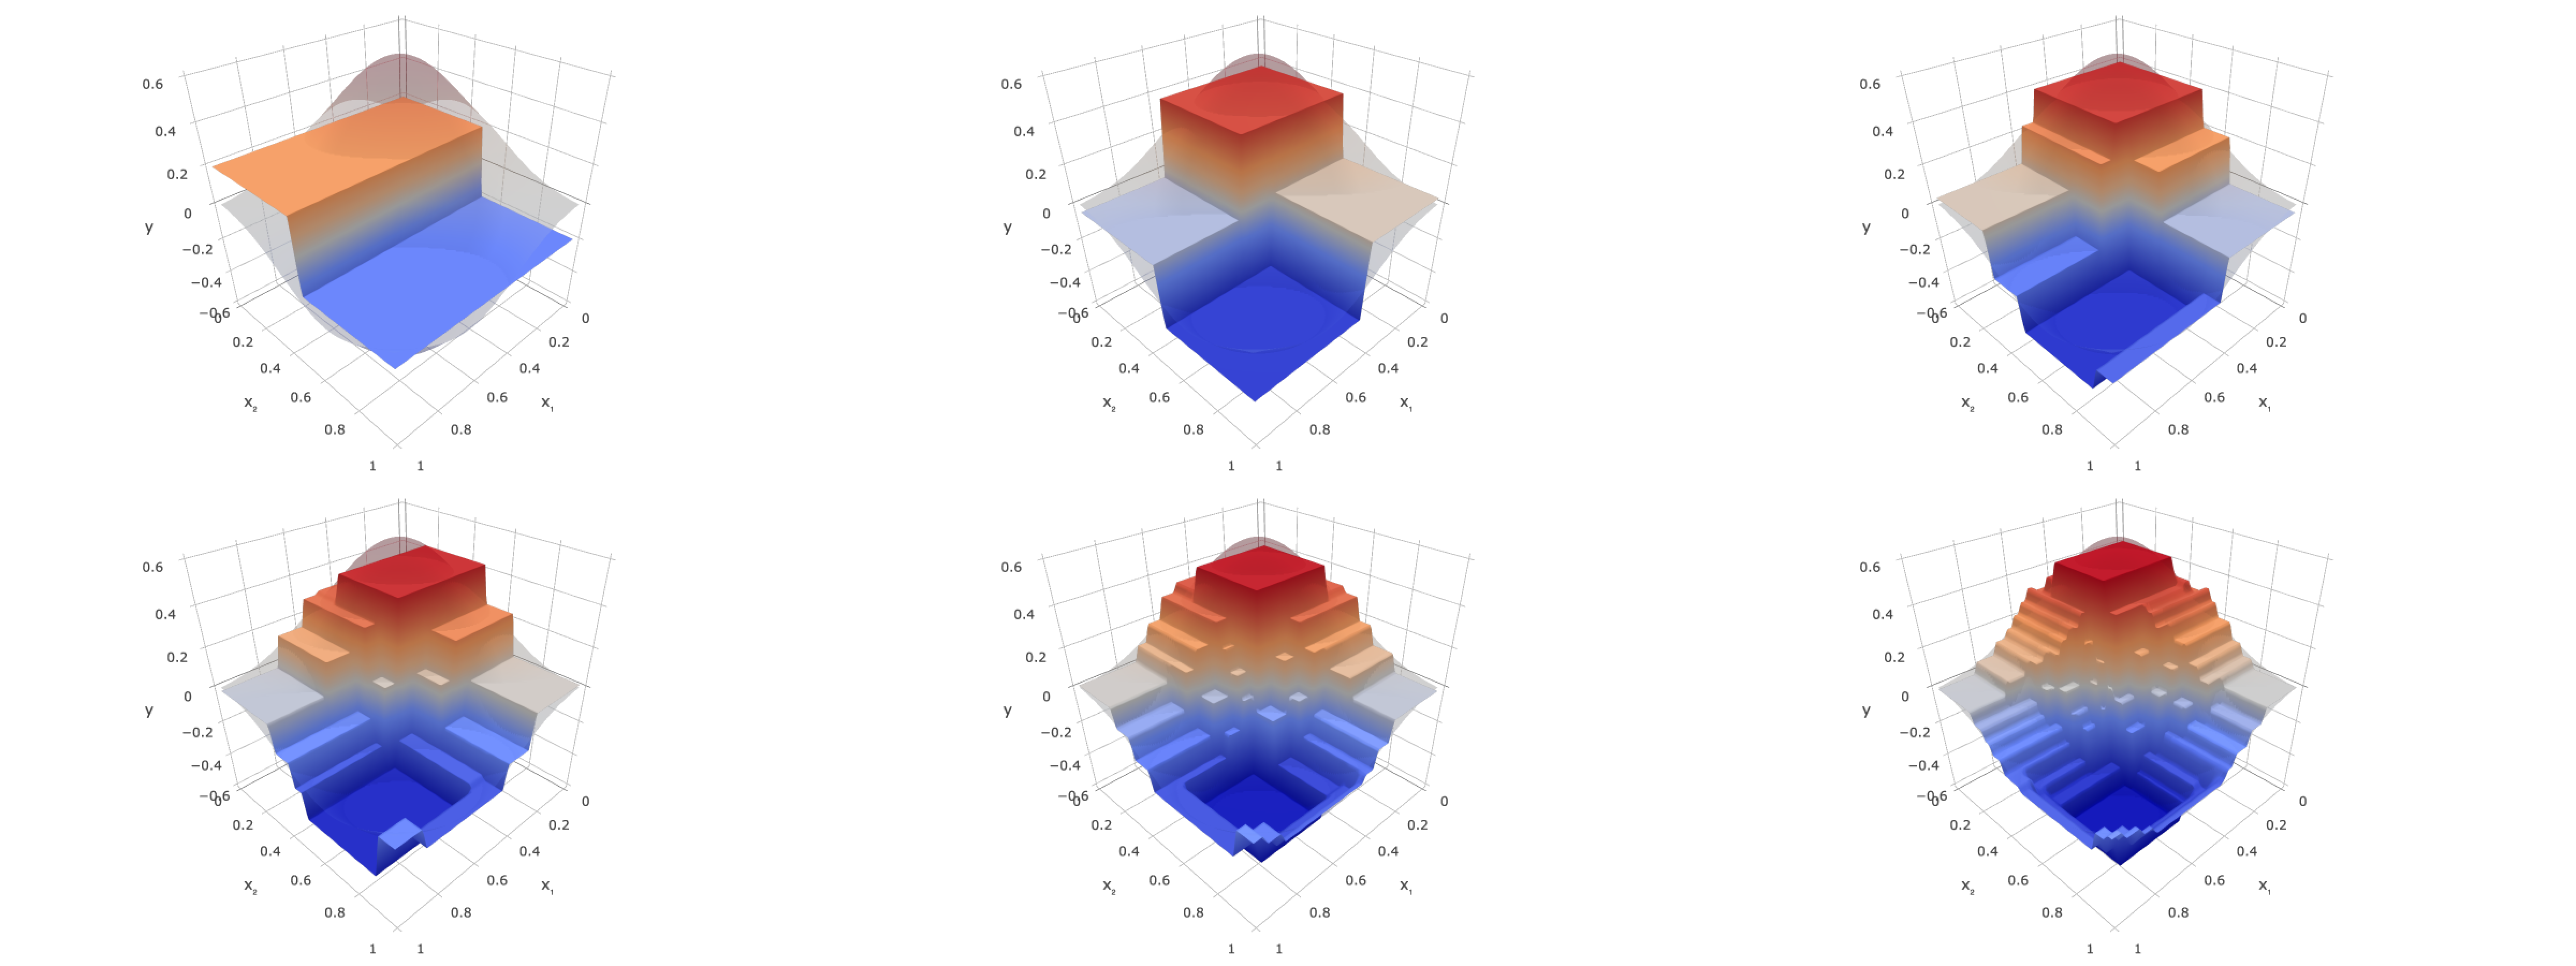

# Q4: Implement GBDT.

In [2]:
class MyGradientBoostingRegressor:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.trees = []
        self.losses = []
        
    def fit(self, X, y):
        self.trees = []
        self.losses = []
        y_pred = 0
        for i in range(self.n_estimators):
            tree = DTR(max_depth=self.max_depth)
            residuals = y - y_pred
            tree.fit(X, residuals)
            y_pred += self.learning_rate * tree.predict(X)
            self.trees.append(tree)
            self.losses.append(mean_squared_error(y, y_pred))
            
    def predict(self, X):
        y_pred = 0
        for tree in self.trees:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred
    
    def score(self, X, y):
        return mean_squared_error(y, self.predict(X))
    
    def visualize_loss(self):
        plt.figure(figsize=(15, 6))
        plt.plot(self.losses, color='red', label='Loss')
        plt.xlabel('Iteration')
        plt.ylabel('Loss')
        plt.title('Loss vs. Iteration')
        plt.grid()
        plt.show()

Train MSE: 1431.8820123111639
Test MSE: 4541.066694259504


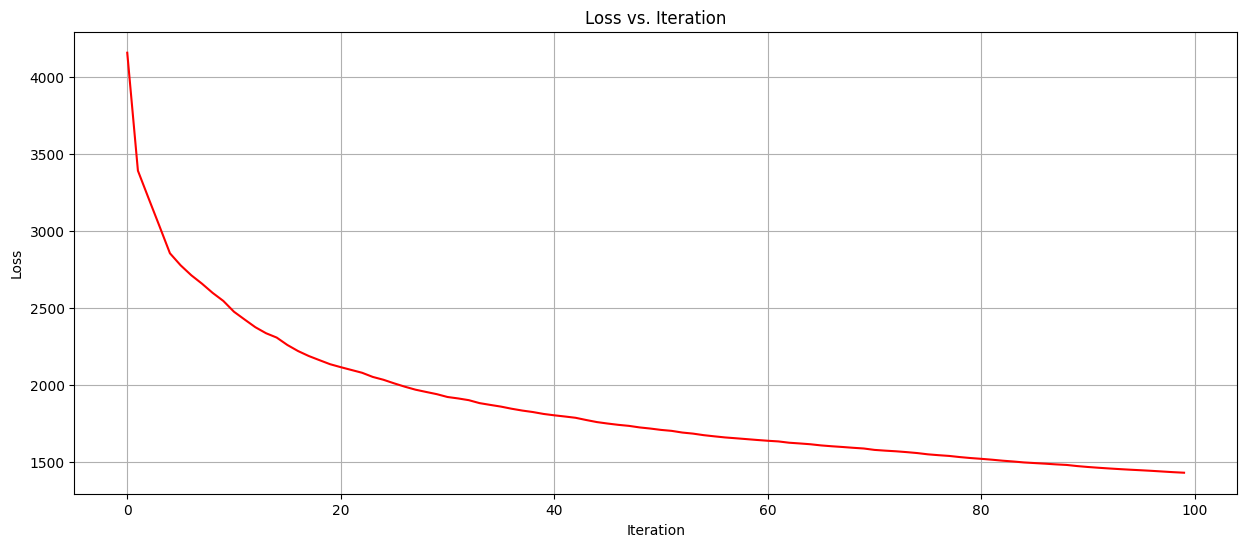

In [3]:
# Load the diabetes 
X, y = datasets.load_diabetes(return_X_y=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit the model
model = MyGradientBoostingRegressor(n_estimators=100, learning_rate=1, max_depth=1)
model.fit(X_train, y_train)

# Evaluate the model
print("Train MSE:", model.score(X_train, y_train))
print("Test MSE:", model.score(X_test, y_test))

# Visualize the loss
model.visualize_loss()

In [4]:
# Compare with sklearn's GradientBoostingRegressor
model = GBR(n_estimators=100, learning_rate=1, max_depth=1)
model.fit(X_train, y_train)
print("Train MSE:", mean_squared_error(y_train, model.predict(X_train)))
print("Test MSE:", mean_squared_error(y_test, model.predict(X_test)))

Train MSE: 1431.8820123111643
Test MSE: 4541.066694259505


In [5]:
# Compare with sklearn's DecisionTreeRegressor
model = DTR(max_depth=100)
model.fit(X_train, y_train)
print("Train MSE:", mean_squared_error(y_train, model.predict(X_train)))
print("Test MSE:", mean_squared_error(y_test, model.predict(X_test)))

Train MSE: 0.0
Test MSE: 7376.595505617977
